# Feature Engineering Geospatial Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [13]:
sale_data = pd.read_csv('data_available/sale_data_post_C&W.csv', sep=',')
sale_data.shape

(8235, 14)

In [14]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8235 entries, 0 to 8234
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daft_id          8235 non-null   int64  
 1   url              8235 non-null   object 
 2   name             8235 non-null   object 
 3   price            8235 non-null   float64
 4   sale_type        8235 non-null   object 
 5   floor_area       8235 non-null   int64  
 6   entered_renewed  8235 non-null   object 
 7   views            8235 non-null   float64
 8   type             8235 non-null   object 
 9   scraping_date    8235 non-null   object 
 10  latitude         8235 non-null   float64
 11  longitude        8235 non-null   float64
 12  bedroom          8235 non-null   int64  
 13  bathroom         8235 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 900.8+ KB


- `latitude`
- `longitude`

### Geopandas

In [15]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def do_geocode(geolocator, lat, lon, attempt=1, max_attempts=10):
    try:
        return geolocator.reverse(f"{lat}, {lon}")
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(geolocator, lat, lon, attempt=attempt+1)
        else: # raise
            print('!!!!!!!!!!!!!')
            return np.nan


def location_features(df, attempt=1, max_attempts=5): ## this is so slow
    
    lat_series = df['latitude']
    lon_series = df['latitude']
    
    geolocator = Nominatim(user_agent="my_geocoder")
    location_dict = {'country_code': [], 
                    'country': [], 
                    'postcode': [], 
                    'state_district': [], 
                    'county': [], 
                    'municipality': [], 
                    'city': [], 
                    'town': [], 
                    'city_district': [], 
                    'locality': [], 
                    'road': [], 
                    'house_number': []}
    
    for i, coordinates in enumerate(zip(lat_series, lon_series)):
        lat = coordinates[0]
        lon = coordinates[1]
        
        time.sleep(1) # sleeps for 1 second
        
        try:
            #location = geolocator.reverse(f"{lat}, {lon}")
            location = do_geocode(geolocator, lat, lon, attempt=1, max_attempts=5)
        except: continue
            #location = 
 
            
        for key in location_dict:
            try:
                location_dict[key].append(location.raw['address'][key])
            except:
                location_dict[key].append(np.nan)
        
            
        
        if i in range(0, df.shape[0], 100):
            print(i)
        
            
    return location_dict 

In [16]:
def location_dataframe(df, dictionary):

    print(df.shape)
    for key in dictionary:
        df[key] = dictionary[key]
    print(df.shape)
    return df

In [17]:
def location_engineering(df):
    location_dict = location_features(df)
    df = location_dataframe(df, location_dict)
    return df

In [18]:
#sale_data = location_engineering(sale_data)

In [19]:
print(sale_data.shape)
sale_dict = location_features(sale_data)
len(sale_dict['postcode'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200


KeyboardInterrupt: 

In [ ]:
print(sale_data.shape)
for key in sale_dict:
    sale_data[key] = sale_dict[key]
print(sale_data.shape)

In [ ]:
sale_data.to_csv('data_available/sale_data_post_loc_eng.csv', sep=',', index=False)

In [ ]:
sale_data = pd.read_csv('data_available/sale_data_post_loc_eng.csv', sep=',')
sale_data.shape

In [13]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daft_id          10448 non-null  int64  
 1   url              10448 non-null  object 
 2   name             10448 non-null  object 
 3   price            10448 non-null  float64
 4   sale_type        10448 non-null  object 
 5   floor_area       10448 non-null  int64  
 6   entered_renewed  10448 non-null  object 
 7   views            10448 non-null  float64
 8   type             10448 non-null  object 
 9   scraping_date    10448 non-null  object 
 10  latitude         10448 non-null  float64
 11  longitude        10448 non-null  float64
 12  bedroom          10448 non-null  object 
 13  bathroom         10448 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


### Reverse-Geocode

In [ ]:
import reverse_geocode

In [ ]:
coordinates = (54.276114, -8.506455), (54.276114, -8.506455)
reverse_geocode.search(coordinates)

### Polar Coordinates

In [5]:
# Converting Cartesian Coordinate to Polar Coordinate
# Importing math library
import math

# Reading cartesian coordinate
x = sale_data['latitude']
y = sale_data['longitude']

# Converting cartesian to polar coordinate
# Calculating radius
#radius = math.sqrt( x * x + y * y )
radius = ((x * x) + (y * y)) ** (1 / 2)
# Calculating angle (theta) in radian
theta = np.arctan(y / x)
# Converting theta from radian to degree
theta = 180 * theta / math.pi

# Displaying polar coordinates
#print('Polar coordinate is: (radius = %0.2f,theta = %0.2f)' %(radius, theta))

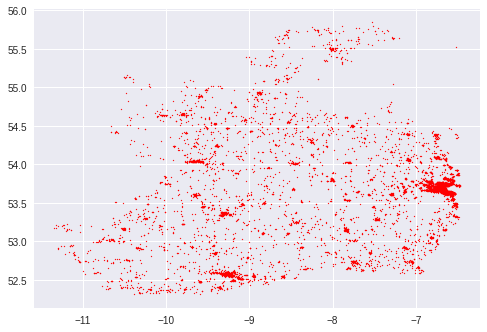

In [6]:
plt.scatter(theta, radius, color='red', s=1);#alpha=0.1

### Rotational Cartesian Coordinates

In [7]:
def rotation(df):
    rot_45_x = (0.707 * df['latitude']) + (0.707 * df['longitude'])
    rot_45_y = (0.707 * df['longitude']) + (0.707 * df['latitude'])
    rot_30_x = (0.866 * df['latitude']) + (0.5 * df['longitude'])
    rot_30_y = (0.866 * df['longitude']) + (0.5 * df['latitude'])
    return rot_45_x, rot_45_y, rot_30_x, rot_30_y

In [8]:
rot_45_x, rot_45_y, rot_30_x, rot_30_y = rotation(sale_data)

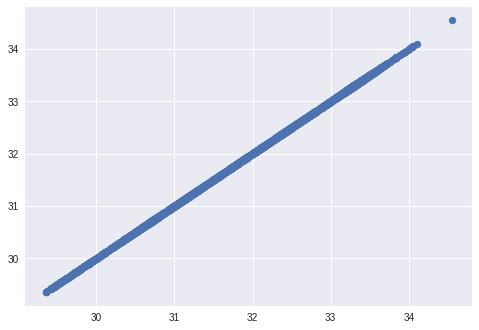

In [9]:
plt.scatter(rot_45_x, rot_45_y);

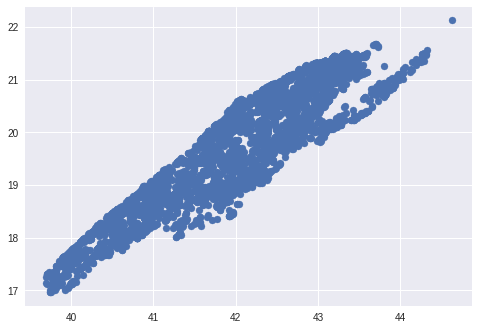

In [10]:
plt.scatter(rot_30_x, rot_30_y);

### Haversine Distance

In [66]:
def haversine_dist(lat1,lng1,lat2,lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    radius = 6371  # Earth's radius taken from google
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

### Manhattan Distance

In [67]:
def manhattan_dist(lat1, lng1, lat2, lng2):
    '''
    calculating two haversine distances by,
     - avoiding Latitude of one point 
     - avoiding Longitude of one point
    and adding it together.
    '''
    a = haversine_dist(lat1, lng1, lat1, lng2)
    b = haversine_dist(lat1, lng1, lat2, lng1)
    return a + b

### Bearing Degree

In [68]:
def bearing_degree(lat1, lng1, lat2, lng2):
    '''
    calculate angle between two points
    '''
    radius = 6371  # Mean radius of Earth
    diff_lng = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(diff_lng) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(diff_lng)
    return np.degrees(np.arctan2(y, x))

### Rotational Coordinates using PCA

Here, the idea is only to rotate them which would help decision tree splits in typical tree-based models.

In [69]:
from sklearn.decomposition import PCA
def pca(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    coordinates = data[['x','y']].values
    pca_obj = PCA().fit(coordinates)
    pca_x = pca_obj.transform(data[['x', 'y']])[:,0]
    pca_y = pca_obj.transform(data[['x', 'y']])[:,1]
    return pca_x, pca_y

### Assing Coordinates to Different Clusters

In [70]:
from sklearn.cluster import KMeans

def cluster(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y) coordinates
    output: series of cluster labels that each row of coordinates belongs to.
    '''
    model = KMeans(n_clusters=50)
    labels = model.fit_predict(data)
    return labels

#### Visualization

In [39]:
import matplotlib.pyplot as plt
def visualize(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    plt.scatter(data['longitude'], data['latitude'], color='blue', s=1, alpha=0.1)
    #data[['longitude','latitude']].scatter(color='blue', s=1, alpha=0.1)
    plt.title('Visualization of Latitude and Longitude')
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    #plt.ylim([53.350, 53.325])
    #plt.xlim([-6.24, -6.23])
    plt.show()

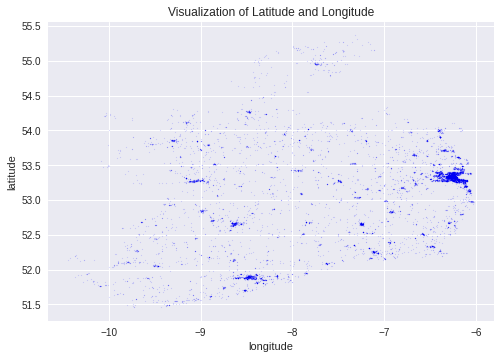

In [40]:
visualize(sale_data)